In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
from node2vec import Node2Vec

df = pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [3]:
df.job = df.job.apply(lambda x: 0 if x == 'unemployed' else(0 if x == 'student' else( 0 if x == 'housemaid' else(0 if x == 'unknown' else(0 if x == 'blue-collar' else(0 if x == 'retired' else(0 if x == 'technician' else 1)))))))

df.marital = df.marital.apply(lambda x: 0 if x == 'single' else 1)
df.education = df.education.apply(lambda x: 1 if x == 'tertiary' else 0)
df.default = df.default.apply(lambda x: 0 if x == 'no' else 1)
df.housing = df.housing.apply(lambda x: 0 if x == 'no' else 1)
df.loan = df.loan.apply(lambda x: 0 if x == 'no' else 1)
df.contact = df.contact.apply(lambda x: 1 if x == 'cellular' else 0)
df.poutcome = df.poutcome.apply(lambda x: 1 if x == 'success' else 0)
df.y = df.y.apply(lambda x: 1 if x == 'yes' else 0)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,0,0,1787,0,0,1,19,oct,79,1,-1,0,0,0
1,33,1,1,0,0,4789,1,1,1,11,may,220,1,339,4,0,0
2,35,1,0,1,0,1350,1,0,1,16,apr,185,1,330,1,0,0
3,30,1,1,1,0,1476,1,1,0,3,jun,199,4,-1,0,0,0
4,59,0,1,0,0,0,1,0,0,5,may,226,1,-1,0,0,0


In [5]:
X = df[['job','marital','default','housing','loan','contact','poutcome','y']]
X.head()

,job,marital,default,housing,loan,contact,poutcome,y
0,0,1,0,0,0,1,0,0
1,1,1,0,1,1,1,0,0
2,1,0,0,1,0,1,0,0
3,1,1,0,1,1,0,0,0
4,0,1,0,1,0,0,0,0


In [6]:
Y = X['y']
x = X[['job','marital','default','housing','loan','contact','poutcome']]
Y = Y.to_numpy()
x = x.to_numpy()
x = x.T

In [7]:
# job
alpha0 = 0.80
beta0 = 0.40
gamma0 = 0.80

# marital
alpha1 = 0.60
beta1 = 0.40
gamma1 = 0.60

# default
alpha2 = 0.50
beta2 = 0.50
gamma2 = 0.50

# housing
alpha3 = 0.70
beta3 = 0.40
gamma3 = 0.70

# loan
alpha4 = 0.80
beta4 = 0.20
gamma4 = 0.80

# contact
alpha5 = 0.70
beta5 = 0.30
gamma5 = 0.70

# gender
alpha6 = 0.60
beta6 = 0.40
gamma6 = 0.60

aff = {}
aff = {0:np.array([[alpha0,beta0],[beta0,gamma0]]), 1:np.array([[alpha1,beta1],[beta1,gamma1]]),2:np.array([[alpha2,beta2],[beta2,gamma2]]),3:np.array([[alpha3,beta3],[beta3,gamma3]]),4:np.array([[alpha4,beta4],[beta4,gamma4]]),5:np.array([[alpha5,beta5],[beta5,gamma5]]),6:np.array([[alpha6,beta6],[beta6,gamma6]])}

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 

In [8]:
A = np.triu(P_u_v,1)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0



In [9]:
A = A + A.T
np.sum(A) / 2

172725.0

In [10]:
G = nx.from_numpy_matrix(A)

In [11]:
nx.is_connected(G)

True

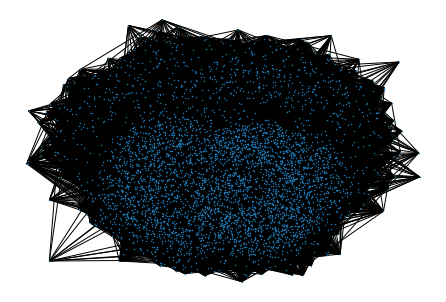

In [12]:
nx.draw(G,node_size=1)

In [13]:
features = X.y.to_dict()

In [14]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

In [15]:
pos = nx.spring_layout(G)

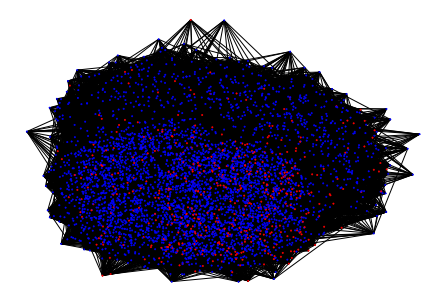

In [16]:
nx.draw(G,labels=features,node_size=2,node_color=color_map,with_labels=False)